<a href="https://colab.research.google.com/github/ratel0307/Deep-Learning/blob/main/MNIST_%EC%86%90%EA%B8%80%EC%94%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%B8%EC%8B%9D_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%A7%81%EC%A0%91_%EB%A7%8C%EB%93%A4%EC%96%B4_%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data_file = open("/MNIST/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [ ]:
len(data_list)

100

In [ ]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

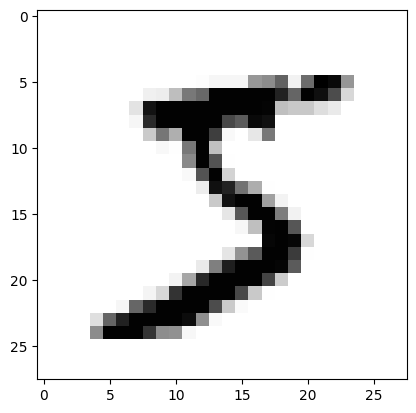

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

all_values = data_list[0].split(',') #쉼표로 구분
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

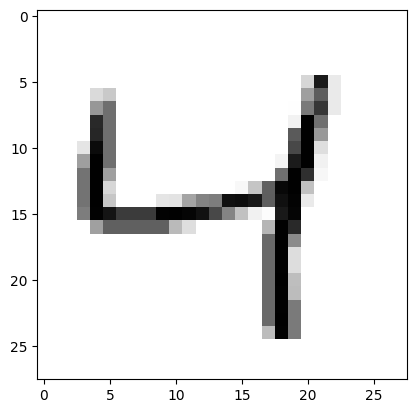

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

all_values = data_list[2].split(',') #쉼표로 구분
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

##MNIST 학습 데이터 준비하기

In [ ]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 #범위 0.01 ~ 1.00
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [ ]:
#출력 노드는 10 (예시)
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99 #all_values[0] = 4

print(targets)

[0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01]


3계층의 신경망으로 MNIST 데이터를 학습하는 코드

In [ ]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

class neuralNetwork:

  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):

    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes

    self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
    self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    self.lr = learningrate

    self.activation_function = lambda x: scipy.special.expit(x)

    pass

  def train(self, inputs_list, targets_list):
  #입력 리스트를 2차원의 행렬로 변환
    inputs = np.array(inputs_list, ndmin=2).T
    targets = np.array(targets_list, ndmin=2).T

    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    output_errors = targets - final_outputs
    hidden_errors = np.dot(self.who.T, output_errors)

    #은닉 계층과 출력 계층 간의 가중치 업데이트
    self.who += self.lr * np.dot((output_errors * final_outputs * (1.0  - final_outputs)), np.transpose(hidden_outputs))
    #입력 계층과 은닉 계층 간의 가중치 업데이트
    self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0  - hidden_outputs)), np.transpose(inputs))

    pass

  def query(self, inputs_list):
    #입력 리스트를 2차원 행렬로 변환
    inputs = np.array(inputs_list, ndmin=2).T
    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    return final_outputs

#입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

#학습률은 0.3
learning_rate = 0.3

#신경망의 인스턴스 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

#mnist 학습 데이터인 csv 파일을 리스트로 불러오기
training_data_file = open("/MNIST/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

#신경망 학습시키기
for record in training_data_list:
  #레코드를 쉼표에 의해 분리
  all_values = record.split(',')
  #입력 값의 범위와 값 조정
  inputs = (np.asfarray(all_values[1:]) / 255.0*0.99) + 0.01
  #결과 값 생성
  targets = np.zeros(output_nodes) + 0.01
  #all_values[0]은 이 레코드에 대한 결과 값
  targets[int(all_values[0])] = 0.99
  n.train(inputs, targets)
  pass



##신경망 테스트하기

7


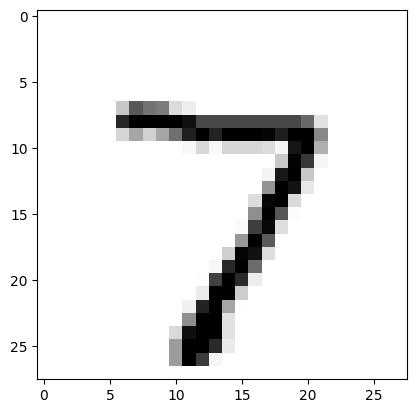

In [ ]:
test_data_file = open("/MNIST/mnist_test_10.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

all_values = test_data_list[0].split(',')
print(all_values[0])

image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [ ]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.03217623],
       [0.02169936],
       [0.02683672],
       [0.12452979],
       [0.1436225 ],
       [0.01732407],
       [0.01147679],
       [0.57364327],
       [0.04445593],
       [0.01651059]])

In [ ]:
#신경망 테스트

#신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

#테스트 데이터 모음 내의 모든 레코드 검색
for record in test_data_list:
  all_values = record.split(',')
  #정답은 첫 번째 값
  correct_label = int(all_values[0])
  print(correct_label, "correct label")
  #입력 값의 범위와 값 조정
  inputs = (np.asfarray(all_values[1:]) / 255.0*0.99) + 0.01
  #신경망에 질의
  outputs = n.query(inputs)
  #가장 높은 값의 인덱스는 레이블의 인덱스와 일치
  label = np.argmax(outputs)
  print(label, "network's answer")
  #정답 또는 오답을 리스트에 추가
  if (label == correct_label):
    scorecard.append(1)
  else:
    scorecard.append(0)
    pass
  pass

7 correct label
7 network's answer
2 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
3 network's answer
5 correct label
4 network's answer
9 correct label
7 network's answer


In [ ]:
print(scorecard) #60점입니다...

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [ ]:
#정답의 비율인 성적을 계산해 출력
scorecard_array = np.array(scorecard)
print("performance =", scorecard_array.sum() / scorecard_array.size)

performance = 0.6


##전체 데이터를 이용해 학습 및 테스트하기

In [ ]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

class neuralNetwork:

  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):

    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes

    self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
    self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    self.lr = learningrate

    self.activation_function = lambda x: scipy.special.expit(x)

    pass

  def train(self, inputs_list, targets_list):
  #입력 리스트를 2차원의 행렬로 변환
    inputs = np.array(inputs_list, ndmin=2).T
    targets = np.array(targets_list, ndmin=2).T

    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    output_errors = targets - final_outputs
    hidden_errors = np.dot(self.who.T, output_errors)

    #은닉 계층과 출력 계층 간의 가중치 업데이트
    self.who += self.lr * np.dot((output_errors * final_outputs * (1.0  - final_outputs)), np.transpose(hidden_outputs))
    #입력 계층과 은닉 계층 간의 가중치 업데이트
    self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0  - hidden_outputs)), np.transpose(inputs))

    pass

  def query(self, inputs_list):
    #입력 리스트를 2차원 행렬로 변환
    inputs = np.array(inputs_list, ndmin=2).T
    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    return final_outputs

#입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

#학습률은 0.3
learning_rate = 0.3

#신경망의 인스턴스 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

#mnist 학습 데이터인 csv 파일을 리스트로 불러오기
training_data_file = open("/MNIST/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

#신경망 학습시키기
for record in training_data_list:
  #레코드를 쉼표에 의해 분리
  all_values = record.split(',')
  #입력 값의 범위와 값 조정
  inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
  #결과 값 생성
  targets = np.zeros(output_nodes) + 0.01
  #all_values[0]은 이 레코드에 대한 결과 값
  targets[int(all_values[0])] = 0.99
  n.train(inputs, targets)
  pass


test_data_file = open("/MNIST/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

#신경망 테스트

#신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

#테스트 데이터 모음 내의 모든 레코드 검색
for record in test_data_list:
  all_values = record.split(',')
  #정답은 첫 번째 값
  correct_label = int(all_values[0])
  #입력 값의 범위와 값 조정
  inputs = (np.asfarray(all_values[1:]) / 255.0*0.99) + 0.01
  #신경망에 질의
  outputs = n.query(inputs)
  #가장 높은 값의 인덱스는 레이블의 인덱스와 일치
  label = np.argmax(outputs)
  #정답 또는 오답을 리스트에 추가
  if (label == correct_label):
    scorecard.append(1)
  else:
    scorecard.append(0)
    pass
  pass


scorecard_array = np.asarray(scorecard)

print("performance =", scorecard_array.sum() / scorecard_array.size)

FileNotFoundError: [Errno 2] No such file or directory: '/MNIST/mnist_train.csv'

In [ ]:
print("performance =", scorecard_array.sum() / scorecard_array.size)

##여러 번 수행을 통한 신경망의 개선

In [ ]:
#신경망 학습시키기

#주기(epoch)란 학습 데이터가 학습을 위해 사용되는 횟수를 의미
epochs = 2

In [9]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

class neuralNetwork:

  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):

    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes

    self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
    self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    self.lr = learningrate

    self.activation_function = lambda x: scipy.special.expit(x)

    pass

  def train(self, inputs_list, targets_list):
  #입력 리스트를 2차원의 행렬로 변환
    inputs = np.array(inputs_list, ndmin=2).T
    targets = np.array(targets_list, ndmin=2).T

    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    output_errors = targets - final_outputs
    hidden_errors = np.dot(self.who.T, output_errors)

    #은닉 계층과 출력 계층 간의 가중치 업데이트
    self.who += self.lr * np.dot((output_errors * final_outputs * (1.0  - final_outputs)), np.transpose(hidden_outputs))
    #입력 계층과 은닉 계층 간의 가중치 업데이트
    self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0  - hidden_outputs)), np.transpose(inputs))

    pass

  def query(self, inputs_list):
    #입력 리스트를 2차원 행렬로 변환
    inputs = np.array(inputs_list, ndmin=2).T
    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    return final_outputs

#입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

#학습률은 0.3
learning_rate = 0.1

#신경망의 인스턴스 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

#mnist 학습 데이터인 csv 파일을 리스트로 불러오기
training_data_file = open("/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

#신경망 학습시키기

#주기 5로 설정
epochs = 5

for e in range(epochs):
  for record in training_data_list:
    #레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    #입력 값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #결과 값 생성
    targets = np.zeros(output_nodes) + 0.01
    #all_values[0]은 이 레코드에 대한 결과 값
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass


test_data_file = open("/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

#신경망 테스트

#신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

#테스트 데이터 모음 내의 모든 레코드 검색
for record in test_data_list:
  all_values = record.split(',')
  #정답은 첫 번째 값
  correct_label = int(all_values[0])
  #입력 값의 범위와 값 조정
  inputs = (np.asfarray(all_values[1:]) / 255.0*0.99) + 0.01
  #신경망에 질의
  outputs = n.query(inputs)
  #가장 높은 값의 인덱스는 레이블의 인덱스와 일치
  label = np.argmax(outputs)
  #정답 또는 오답을 리스트에 추가
  if (label == correct_label):
    scorecard.append(1)
  else:
    scorecard.append(0)
    pass
  pass


scorecard_array = np.asarray(scorecard)
print("performance =", scorecard_array.sum() / scorecard_array.size)

performance = 0.9732


##직접 손글씨써서 실험해보기

In [11]:
from PIL import Image
import numpy as np

def recognize_image(image_path):
    # 이미지를 흑백으로 변환
    img = Image.open(image_path).convert('L')

    # 이미지를 1차원 배열로 변환
    img_array = np.array(img).reshape(784)

    # 이미지 데이터를 신경망의 입력 형식으로 변환
    img_data = 255.0 - img_array
    img_data = (img_data / 255.0 * 0.99) + 0.01

    # 신경망에 질의
    outputs = n.query(img_data)

    # 가장 높은 값을 가진 인덱스 찾기
    label = np.argmax(outputs)

    return label

# /seven.png 이미지 인식
recognized_label = recognize_image("/seven.png")
print("Recognized label for /seven.png:", recognized_label)

Recognized label for /seven.png: 3


In [13]:
def recognize_image(image_path):
    # 이미지를 흑백으로 변환
    img = Image.open(image_path).convert('L')

    # 이미지를 1차원 배열로 변환
    img_array = np.array(img).reshape(784)

    # 이미지 데이터를 신경망의 입력 형식으로 변환
    img_data = 255.0 - img_array
    img_data = (img_data / 255.0 * 0.99) + 0.01

    # 신경망에 질의
    outputs = n.query(img_data)

    # 가장 높은 값을 가진 인덱스 찾기
    label = np.argmax(outputs)

    return label

# /two.png 이미지 인식
recognized_label = recognize_image("/two.png")
print("Recognized label for /two.png:", recognized_label)

Recognized label for /two.png: 2


In [14]:
def recognize_image(image_path):
    # 이미지를 흑백으로 변환
    img = Image.open(image_path).convert('L')

    # 이미지를 1차원 배열로 변환
    img_array = np.array(img).reshape(784)

    # 이미지 데이터를 신경망의 입력 형식으로 변환
    img_data = 255.0 - img_array
    img_data = (img_data / 255.0 * 0.99) + 0.01

    # 신경망에 질의
    outputs = n.query(img_data)

    # 가장 높은 값을 가진 인덱스 찾기
    label = np.argmax(outputs)

    return label

# /two.png 이미지 인식
recognized_label = recognize_image("/nine.png")
print("Recognized label for /nine.png:", recognized_label)

Recognized label for /nine.png: 9


In [16]:
def recognize_image(image_path):
    # 이미지를 흑백으로 변환
    img = Image.open(image_path).convert('L')

    # 이미지를 1차원 배열로 변환
    img_array = np.array(img).reshape(784)

    # 이미지 데이터를 신경망의 입력 형식으로 변환
    img_data = 255.0 - img_array
    img_data = (img_data / 255.0 * 0.99) + 0.01

    # 신경망에 질의
    outputs = n.query(img_data)

    # 가장 높은 값을 가진 인덱스 찾기
    label = np.argmax(outputs)

    return label

# /two.png 이미지 인식
recognized_label = recognize_image("/seven_2.png")
print("Recognized label for /seven_2.png:", recognized_label)

Recognized label for /seven_2.png: 7
